# Imports

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

from PIL import Image
from scipy.interpolate import splprep, splev

# Detection Method

In [5]:
def detection(color):

    if color=="red":
        lower_value = np.array([155, 85, 0], dtype = "uint8") 
        upper_value= np.array([179, 255, 255], dtype = "uint8")

    if color=="yellow":
        lower_value = np.array([21, 87, 99], dtype = "uint8") 
        upper_value= np.array([31, 255, 255], dtype = "uint8")

    if color=="orange":
        lower_value = np.array([0, 76, 0], dtype = "uint8") 
        upper_value= np.array([17, 255, 255], dtype = "uint8")

    if color=="green":
        lower_value = np.array([35, 31, 0], dtype = "uint8") 
        upper_value= np.array([93, 255, 255], dtype = "uint8")
        
    image = cv2.imread('sebbi.png') # read image
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)    # convert to HSV
    mask0 = cv2.inRange(hsv, lower_value, upper_value)  # mask for color

    kernel = np.ones((15,15),np.uint8)  # 15x15 kernel for morphological transformation
    opening = cv2.morphologyEx(mask0, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((5,5),np.uint8)  # 20x20 kernel for morphological transformation
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # find contours
    c = max(contours, key = cv2.contourArea) # find the biggest contour (c) by the area

    # find the center of the contour
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    # find the spline
    tck, u = splprep(c[:,0,:].T, s=0.0)    
    u_new = np.linspace(u.min(), u.max(), 1000) 
    x_new, y_new = splev(u_new, tck, der=0)

    # plot the spline
    plt.figure(figsize=(8, 8))
    plt.imshow(closing, cmap='gray')
    plt.plot(x_new, y_new, 'r')
    plt.plot(cx, cy, 'bo') 
    plt.show()
    
    print("Center of biggest Area in (x,y): (",cx, ",",cy,")")   # print the center of the contour

    # show original image with contour of biggest area
    image = cv2.imread('sebbi.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.plot(x_new, y_new, 'r')
    plt.plot(cx, cy, 'bo') 
    plt.show()

# Call Method

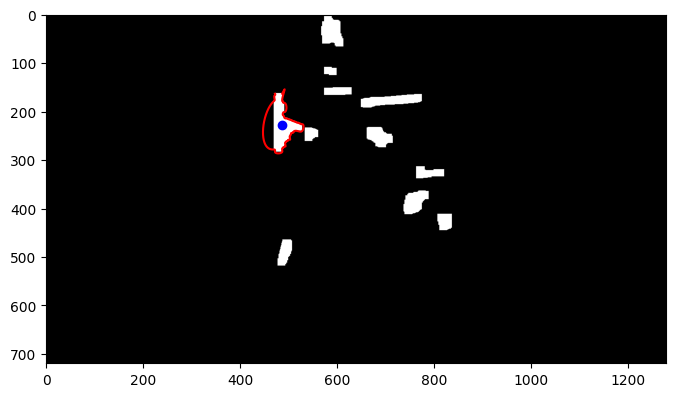

Center of biggest Area in (x,y): ( 487 , 227 )


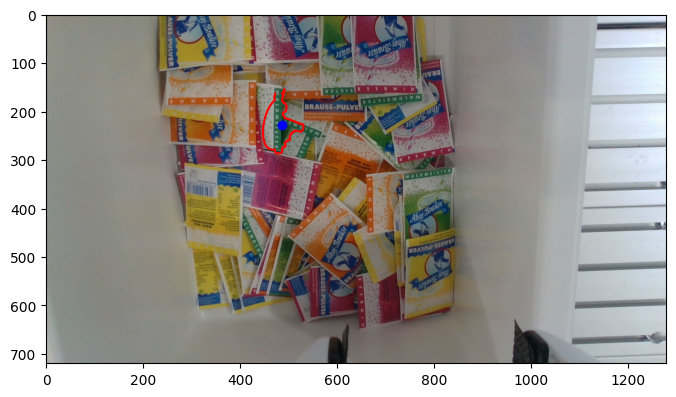

In [6]:
detection(input("Farbe eingeben: (red, yellow, green, orange)"))